<h3>Importing the Libraries

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium 
from folium.plugins import HeatMap

from geopy.geocoders import Nominatim 
from IPython.display import Image

<h3>Reading the Data

In [6]:
df=pd.read_csv(r"C:\Users\tejas\Desktop\New York.csv")
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


<h3>Understanding the data

In [7]:
df.shape

(48895, 16)

The dataset contains <b>48895 records</b> and <b>16 fields</b>

In [12]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The describe() function gives the essential information about the dataset i.e. the<b> mean, standard deviation and the quartiles</b> of the different fields.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

After inspecting the dataset carefully, we find that there are many null values. We need to check the number of null values in each column.

In [16]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are <b>16</b> null values in the "name" field, <b>21</b> null values in the "host_name" and <b>10052</b> null values in both the "last_review" and the "reviews_per_month" columns.<br>
We need to remove this null values from the dataset when analyzing the data.


In [25]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

Hence we have removed the null values from the "reviews_per_month" field.

In [62]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

The neighbourhood_group field contains 4 districts:<br><b>
1. Brooklyn
2. Manhattan
3. Staten Island
4. Bronx

In [63]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In New York, there are only 3 types of rooms that are listed on Airbnb:<b>
1. Private Room
2. Entire home or Apartment
3. Shared Room</b>

Lets check which person has the maximum number of listings on Airbnb. To analyse it, we take the 'host_id' field as the it is unique to all the host whereas if we analyse the 'host_name' field there will be different hosts with the same name.  

In [10]:
df.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

Host with the ID <b>219517861</b> has the maximum number of listings on Airbnb. Lets check the host's name.

In [52]:
coun=df[df.host_id==219517861]['host_name']
print(coun.unique())
coun.count()

['Sonder (NYC)']


327

The host with the name '<b>Sonder (NYC)</b>' has the maximum number of room listings of 327. If we analyse the 'calculated_host_listings_count' field,we observe that the column contains the total number of listings for that particular host.  

In [95]:
coun=df[df.host_name=='Sonder (NYC)']['calculated_host_listings_count']
coun

38293    327
38294    327
38588    327
39769    327
39770    327
        ... 
47691    327
47692    327
47693    327
47814    327
47821    327
Name: calculated_host_listings_count, Length: 327, dtype: int64

In [55]:
son=df[df.host_name=='Sonder (NYC)']
print(son.neighbourhood_group.unique())
max=son.price.max()
min=son.price.min()
print(max,df[df.price==max]['room_type'].unique())
print(min,df[df.price==min]['room_type'].unique())

['Manhattan']
699 ['Entire home/apt' 'Private room']
100 ['Entire home/apt' 'Private room' 'Shared room']


Host 'Sonder (NYC)' has only listed rooms only in the <b>Manhattan</b> area of New York with the maximum price of <b>699</b> dollars on 'Entire homes/apartments' and 'Private room' and the minimum price of <b>100</b> dollars on the all three types of rooms available.

<h3>Data Visualization

<Figure size 1080x288 with 0 Axes>

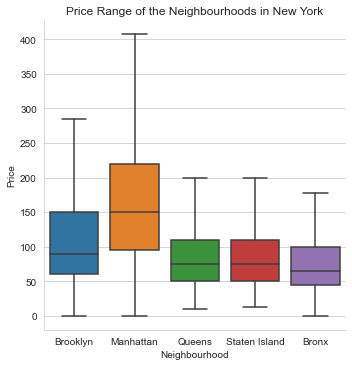

In [10]:
sns.set_style('whitegrid')
sns.catplot(x='neighbourhood_group',y='price',data=df,kind='box',sym='')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price Range of the Neighbourhoods in New York')
plt.show()

This boxplot tells us that:<br>
1. In terms of the price range, rooms available in Manhattan is <b>expensive</b> when we compare it to other neighbourhoods with an average of <b>150</b> dollars per night.
2. The price range of the rooms available in the Queens,Staten Island and the Bronx are <b>identical</b>.

Text(0.5, 1.0, 'Price Range of the Neighbourhoods in New York')

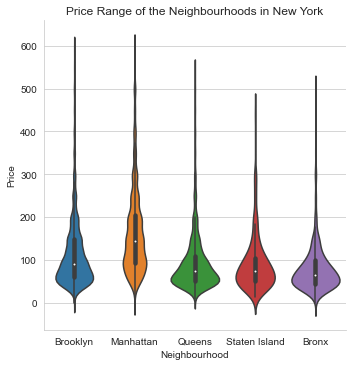

In [20]:
less=df[df.price<600]
sns.set_style('whitegrid')
sns.catplot(x='neighbourhood_group',y='price',data=less,kind='violin')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price Range of the Neighbourhoods in New York')

To get a violin plot we had to analyse the prices less than 600 due to the high difference in the prices of the rooms. Hence we can confirm that:<br>
1. The rooms listed in Manhattan are expensives ,followed by Brooklyn.
2. The prices of the rooms in Queens,Bronx, Staten Island are almost identical, with an average price of <b>80 </b>dollars per night.

Lets find out the most expensive room listed on Airbnb in Manhattan.

In [16]:
manh=df[df.neighbourhood_group=='Manhattan']
print(manh.price.max())
df.price.max()

10000


10000

The maximum price of a room in Manhattan is <b>10000</b> dollars. It happens to be the most expensive room available in the dataset.

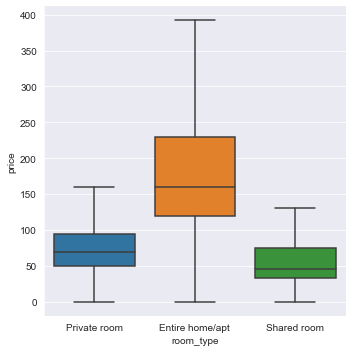

In [3]:
sns.set_style('darkgrid')
sns.catplot(x='room_type',y='price',data=df,kind='box',sym='')

The boxplot above gives the relationship between the types of rooms and their prices.We can conclude that:
1. The Apartment type of rooms are <b>expensive</b> with a median price of just greater than <b>150 dollars</b>.
2. The median of the price of the private room and the shared room is not off large difference.


<Figure size 1440x360 with 0 Axes>

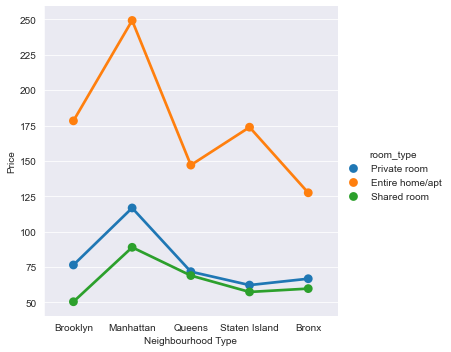

In [67]:
plt.figure(figsize=(20,5))
sns.catplot(x='neighbourhood_group',y='price',data=df,kind='point',hue='room_type',ci=None)
plt.xlabel("Neighbourhood Type")
plt.ylabel("Price")
plt.show()

The points signifies the average price of the room for that neighbourhood.
1. The rooms available in Manhattan regardless of the room type are expensive when compared to the other neighbpourhood.
2. There is a large difference in the prices of the Apartment rooms compared to the other type of rooms in each neighbourhood. 
3. In terms of prices, rooms listed in Bronx are less expensive and less in number.

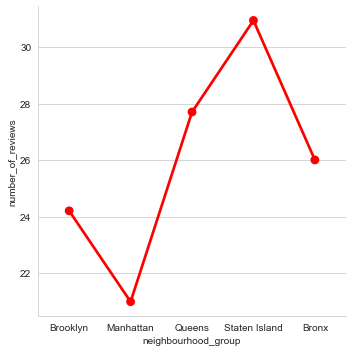

In [11]:
sns.catplot(x='neighbourhood_group',y='number_of_reviews',data=df,kind='point',color='red',ci=None)

1. Rooms in Staten Island have received most number of reviews by the customers, followed by Queens and Bronx.
2. Although Manhattan have the expensive rooms, the number of reviews given by the customers is less and is the least amongst the other neighbourhoods.

Lets check whether the rooms availability impact the ratings of the rooms. 


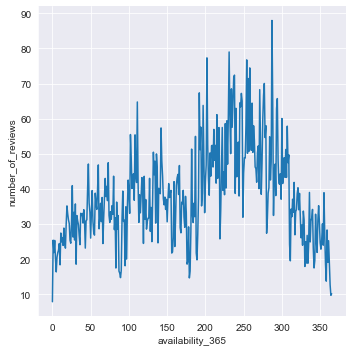

In [22]:
sns.set_style('darkgrid')
sns.relplot(x='availability_365',y='number_of_reviews',data=df,kind='line',ci=None)

As we can see, there is a irregular trend in the availabality of the room and the reviews it receives. When analysing the reviews of a room listed, its availabilty throughout the year should not be considered.

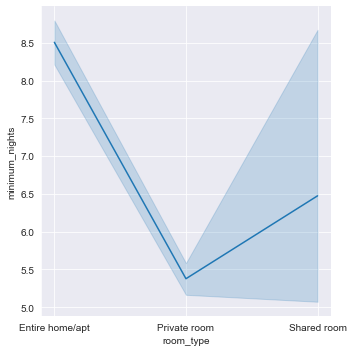

In [70]:
sns.set_style('darkgrid')
sns.relplot(x='room_type',y='minimum_nights',data=df,kind='line')

The dark blue line in the line plot gives the average number of nights spent by the customers in a particular type of room. The shaded region gives the confidence level.<br>
1. Customers tend to spend more number of nights in an Apartment type of room with an average of <b>8.5</b> nights spent.
2. The suprising note here is that the customers would spend more number of nights in a shared room than spending it in a private room even though the room types mentioned above have a similar price range.

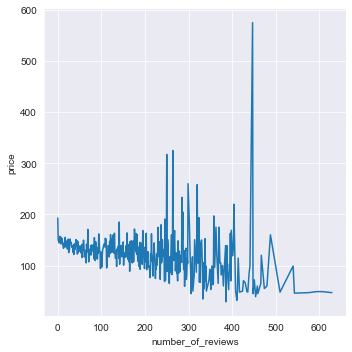

In [28]:
sns.set_style('darkgrid')
sns.relplot(x='number_of_reviews',y='price',data=df,kind='line',ci=None)

We can see that there is a gradual decrease in the graph, with the decrease in price of the room, the number of reviews received increases. Although we can observe that even a fairly expensive room has received many number of reviews (like in the graph, for a room priced at <b>600 dollars has received around 450 reviews</b>, we can say that the graph has an irregular trend.  

In [14]:
df[['latitude','longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


<Figure size 720x432 with 0 Axes>

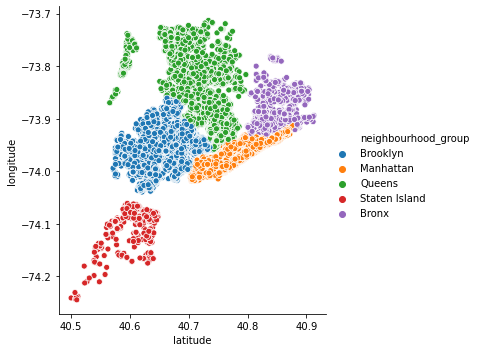

In [40]:
plt.figure(figsize=(10,6))
sns.relplot(x='latitude',y='longitude',data=df,hue='neighbourhood_group')

Here we plot the location of each room listed in each neighbourhoods of New York using its geographical coordinates, hence getting a rough sketch of New York.

Lets create the proper map of New York.

In [8]:
group=df.neighbourhood_group.unique()

lat=[]
long=[]
geolocator=Nominatim(user_agent='new_york')
for neigh in group:
    location=geolocator.geocode(neigh)
    latitude=location.latitude
    longitude=location.longitude
    lat.append(latitude)
    long.append(longitude)


We are extracting the geographical coordinates of each neighbourhood using the geopy package.

In [9]:
new_york=pd.DataFrame({'Neighborhood': group})
new_york['Latitude']=lat
new_york['Longitude']=long
new_york

,Neighborhood,Latitude,Longitude
0,Brooklyn,40.650104,-73.949582
1,Manhattan,40.789624,-73.959894
2,Queens,40.749824,-73.797634
3,Staten Island,40.583456,-74.149605
4,Bronx,40.846651,-73.878594


We have created a dataframe containing the neighbourhood names and its constituent geographical locations.

In [32]:
map_NY=folium.Map(location=[40.650104,-73.949582],zoom_start=10)

for lat, lng, neighborhood in zip(new_york['Latitude'], new_york['Longitude'], new_york['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_NY)  
    
map_NY

Using the folium package , we have created a map of the New York with the circular marker indicating the neighbourhoods of New York.

In [90]:
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']],radius=8).add_to(m)

for lat, lng, neighborhood in zip(new_york['Latitude'], new_york['Longitude'], new_york['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(m)
m    

The Heat map shows:
1. Manhattan having the maximum intensity in the heat map with more number of room listed on Airbnb.
2. If we analyse the Staten Island and Bronx neighbourhood , we can observe that the heat map is off less intensity indicating the less rooms. 

<h3>Conclusion

This dataset contains the rooms listed on Airbnb New York for the year of 2019.It is a rich dataset with a variety of columns that helped us perform exploration on each significant column present. After analyzing the dataset-finding the relationships between the all the features and plotting the trends within it, we were able to come up with some observations:
1. The hosts are making good use of Airbnb to list their rooms with 'Sonder(NYC)' making the most listings of 327.
2. Manhattan is one of the most expensive places to live in, whereas Bronx appears to have lower standards of living.
3. The hosts need to ensure that the rooms listed in Manhattan get reviews regularly from their customers.
4. The demand for apartment type of rooms is high when compared to other room types.



